# Term project - Guns vs Butter
### Bence Szabo (2508584)

## Research question, hypothesis
While investigating the potential negative association between military expansion and the funding of inequality-reducing social welfare programs - specifically healthcare, does the prioritization of military expenditure crowd out public healthcare investments, thereby limiting the state's capacity to reduce social inequality?

My hypothesis is that increased military spending has a crowd-out effect on public healthcare investment, therefore increasing social inequality.

In [23]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimpy import skim
import seaborn as sns
from stargazer.stargazer import Stargazer
import statsmodels.formula.api as smf
import statsmodels.api as sm

warnings.filterwarnings('ignore')

## 1. Introduction
Access to healthcare is a very important factor that determines income and social inequality. Public healthcare spending is one of the major mechanisms governments use to redistribute wealth and provide a safety net for lower-income populations. Government have limited budget and high military spending (variable x) often competes directly with social/healthcare spending (variable y). Therefore, by analyzing if military spending reduces healthcare spending, we are analyzing a structural driver of inequality. 

While inequality is often measured by income gaps, it is maintained by the lack of access to essential public services. Public healthcare expenditure is a key proxy for a state's commitment to reducing social inequality. My analysis investigates whether higher military expenditure creates a crowding-out effect, effectively reducing the resources available for health programs reducing inequality.

By exploring the negative relationship that might exist between military expansion spending and the allocation of funds that can reduce inequality, with particular emphasis on healthcare, does military spending crowd out government spending on healthcare, therefore weakening the options of states in reducing inequality?

## 2. Data
I have downloaded data from the World Bank website, selecting the following series:
- Dependent variable (y): Current health expenditure (% of GDP),
- Main explanatory variable (x): Military expenditure (% of GDP),
- Development indicators: GDP growth (annual %), GDP per capita (current US$),
- Population indicator: Population ages 65 and above (% of total population),
- Fiscal policy indicator: Government revenue, excluding grants (% of GDP),
- Urbanization indicator: Urban population (% of total population).

All data was from 2022 and I have also downloaded the same data for 2014 for external validation.

In [24]:
# import data

df = pd.read_csv('./WB_data.csv')
df.head()


,country_name,country_code,year,health_expenditure_pct_gdp,health_expenditure_percap_usd,gdp_growth_pct_annual,gdp_percap_usd,military_expenditure_pct_gdp,military_expenditure_usd,pop_age_above_65_pct_total_pop,total_pop,gov_revenue_gdp_pct,urban_pop_pct_total_pop
0,Afghanistan,AFG,2014,9.52887821,60.04951096,2.724543362,625.0549418,1.298012878,268238787.7,2.356536,32792523,8.613730505,24.587
1,Albania,ALB,2014,6.43451118,293.1267395,2.240226954,4602.230514,1.346515991,178120368,12.166769,2889104,24.39934902,56.423
2,Algeria,DZA,2014,6.01485014,366.5867004,4.099999999,6094.693923,5.548483336,9724379972,5.086183,39205031,.,70.221
3,American Samoa,ASM,2014,.,.,1.762820513,12026.33449,.,.,4.906857,53466,.,87.288
4,Andorra,AND,2014,6.77308035,3001.196045,2.504465521,44369.65969,.,.,12.860572,73737,.,88.441


## 3. Model
### 3.1. Feature engineering
After importing the data I have converted the missing data (denoted with value "." in the .csv) to null values, converted all numbers to float type and dropped observations where the y or the x variable value was missing. This left me with 298 observations. After this I created dummy variables from the population % aged 65 and above (0-5%, 5-10%, 10-20%, 20+%) and the urban population % (0-20%, 20-40%, 40-60%, 60-80%, 80+%). For the GDP per capita I created income groups of Low, Lower-Mid, Upper-Mid and High by splitting the data into 4 equal-sized groups using quartiles which ensured that I had enough observations in every category. I also created their respective categories in string variables.

After this I split the dataset into two datasets, one for 2022 (main) and one for 2014 (for external validation).

In [25]:
# replace missing values as NaN

df = df.replace('.', np.nan)
df.head()

,country_name,country_code,year,health_expenditure_pct_gdp,health_expenditure_percap_usd,gdp_growth_pct_annual,gdp_percap_usd,military_expenditure_pct_gdp,military_expenditure_usd,pop_age_above_65_pct_total_pop,total_pop,gov_revenue_gdp_pct,urban_pop_pct_total_pop
0,Afghanistan,AFG,2014,9.52887821,60.04951096,2.724543362,625.0549418,1.298012878,268238787.7,2.356536,32792523,8.613730505,24.587
1,Albania,ALB,2014,6.43451118,293.1267395,2.240226954,4602.230514,1.346515991,178120368,12.166769,2889104,24.39934902,56.423
2,Algeria,DZA,2014,6.01485014,366.5867004,4.099999999,6094.693923,5.548483336,9724379972,5.086183,39205031,NaN,70.221
3,American Samoa,ASM,2014,NaN,NaN,1.762820513,12026.33449,NaN,NaN,4.906857,53466,NaN,87.288
4,Andorra,AND,2014,6.77308035,3001.196045,2.504465521,44369.65969,NaN,NaN,12.860572,73737,NaN,88.441


In [26]:
# convert numeric columns to float

cols_to_convert = [
    'health_expenditure_pct_gdp',
    'health_expenditure_percap_usd',
	'gdp_growth_pct_annual',
    'gdp_percap_usd',
	'military_expenditure_pct_gdp',
    'military_expenditure_usd',
    'pop_age_above_65_pct_total_pop',
    'total_pop',
    'gov_revenue_gdp_pct',
    'urban_pop_pct_total_pop'
]
df[cols_to_convert] = df[cols_to_convert].astype(float)
df

,country_name,country_code,year,health_expenditure_pct_gdp,health_expenditure_percap_usd,gdp_growth_pct_annual,gdp_percap_usd,military_expenditure_pct_gdp,military_expenditure_usd,pop_age_above_65_pct_total_pop,total_pop,gov_revenue_gdp_pct,urban_pop_pct_total_pop
0,Afghanistan,AFG,2014,9.528878,60.049511,2.724543,625.054942,1.298013,2.682388e+08,2.356536,32792523.0,8.613731,24.587
1,Albania,ALB,2014,6.434511,293.126739,2.240227,4602.230514,1.346516,1.781204e+08,12.166769,2889104.0,24.399349,56.423
2,Algeria,DZA,2014,6.014850,366.586700,4.100000,6094.693923,5.548483,9.724380e+09,5.086183,39205031.0,NaN,70.221
3,American Samoa,ASM,2014,NaN,NaN,1.762821,12026.334490,NaN,NaN,4.906857,53466.0,NaN,87.288
4,Andorra,AND,2014,6.773080,3001.196045,2.504466,44369.659690,NaN,NaN,12.860572,73737.0,NaN,88.441
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,Virgin Islands (U.S.),VIR,2022,NaN,NaN,-1.311232,44320.909190,NaN,NaN,21.811530,105413.0,NaN,96.136
430,West Bank and Gaza,PSE,2022,9.733360,350.638123,4.082760,3799.955270,NaN,NaN,3.702799,5043612.0,NaN,77.291
431,"Yemen, Rep.",YEM,2022,6.186667,38.115692,NaN,NaN,NaN,NaN,2.504076,38222876.0,NaN,39.188
432,Zambia,ZMB,2022,5.255923,76.059624,5.211224,1447.123101,1.118003,3.260788e+08,1.856089,20152938.0,NaN,45.761


In [27]:
# drop missing x and y values

df = df[df['health_expenditure_pct_gdp'].notna() & df['military_expenditure_pct_gdp'].notna()].reset_index(drop=True)
df

,country_name,country_code,year,health_expenditure_pct_gdp,health_expenditure_percap_usd,gdp_growth_pct_annual,gdp_percap_usd,military_expenditure_pct_gdp,military_expenditure_usd,pop_age_above_65_pct_total_pop,total_pop,gov_revenue_gdp_pct,urban_pop_pct_total_pop
0,Afghanistan,AFG,2014,9.528878,60.049511,2.724543,625.054942,1.298013,2.682388e+08,2.356536,32792523.0,8.613731,24.587
1,Albania,ALB,2014,6.434511,293.126739,2.240227,4602.230514,1.346516,1.781204e+08,12.166769,2889104.0,24.399349,56.423
2,Algeria,DZA,2014,6.014850,366.586700,4.100000,6094.693923,5.548483,9.724380e+09,5.086183,39205031.0,NaN,70.221
3,Angola,AGO,2014,2.434129,130.586197,4.822559,5005.999741,4.698455,6.846249e+09,2.704494,27160769.0,30.884549,62.731
4,Argentina,ARG,2014,9.671300,1274.661255,-2.512615,12233.144410,0.878101,4.979443e+09,10.894142,43024071.0,22.332294,91.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,United States,USA,2022,16.496140,12434.433590,2.512375,77860.911290,3.343259,8.606920e+11,16.919620,334017321.0,19.927775,83.084
294,Uruguay,URY,2022,8.945322,1850.807373,4.486227,20818.614610,1.825309,1.297898e+09,15.613406,3390913.0,29.688870,95.688
295,"Venezuela, RB",VEN,2022,4.550474,208.569687,NaN,NaN,0.649887,4.627334e+06,8.982038,28213017.0,NaN,88.378
296,Zambia,ZMB,2022,5.255923,76.059624,5.211224,1447.123101,1.118003,3.260788e+08,1.856089,20152938.0,NaN,45.761


In [28]:
# check the dataset

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 298    │ │ float64     │ 10    │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA %     ┃ mean    ┃ sd       ┃ p0      ┃ p25     ┃ p50      ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year     │  0 │        0 │    2018 │    4.006 │    2014 │    2014 │     2014 │    2022 │     2022 │ ▇    ▇ │  │
│ │ health_e │  0 │        0 │   6.536 │    2.847 │   1.754 │    4.33 │    6.321 │   8.501 │    19.69 │  ▇▇▆▁  │  │
│ │ xpenditu │    │          │         │          │         │         │          │         │          │        │  │
│ │ re_pct_g │    │          │         │          │         │         │          │         │          │        │  │
│ │ dp       │    │          │         │          │         │         │          │         │          │        │  │
│ │ health_e │  0 │        0 │    1275 │     2098 │   16.32 │   88.47 │    377.9 │    1289 │    12430 │  ▇ ▁   │  │
│ │ xpenditu │    │          │         │          │         │         │          │         │          │        │  │
│ │ re_perca │    │          │         │          │         │         │          │         │          │        │  │
│ │ p_usd    │    │          │         │          │         │         │          │         │          │        │  │
│ │ gdp_grow │  2 │ 0.671140 │    3.98 │    5.218 │  -23.04 │   2.166 │    3.969 │   5.609 │    63.33 │   ▇▂   │  │
│ │ th_pct_a │    │ 93959731 │         │          │         │         │          │         │          │        │  │
│ │ nnual    │    │       55 │         │          │         │         │          │         │          │        │  │
│ │ gdp_perc │  2 │ 0.671140 │   16270 │    22710 │   250.5 │    1984 │     6518 │   20830 │   123700 │  ▇▁▁   │  │
│ │ ap_usd   │    │ 93959731 │         │          │         │         │          │         │          │        │  │
│ │          │    │       55 │         │          │         │         │          │         │          │        │  │
│ │ military │  0 │        0 │   1.869 │    1.588 │ 0.03556 │  0.9733 │    1.423 │   2.224 │    15.48 │   ▇▂   │  │
│ │ _expendi │    │          │         │          │         │         │          │         │          │        │  │
│ │ ture_pct │    │          │         │          │         │         │          │         │          │        │  │
│ │ _gdp     │    │          │         │          │         │         │          │         │          │        │  │
│ │ military │  0 │        0 │ 1303000 │ 66320000 │ 4627000 │ 2191000 │ 82690000 │ 5098000 │ 86070000 │   ▇    │  │
│ │ _expendi │    │          │    0000 │      000 │         │      00 │        0 │     000 │     0000 │        │  │
│ │ ture_usd │    │          │         │          │     

In [29]:
# create dummy and string variables for the % population aged 65+

df['old_pop_pct_0_5'] = np.where(df['pop_age_above_65_pct_total_pop'] <=5, 1, 0)
df['old_pop_pct_5_10'] = np.where((df['pop_age_above_65_pct_total_pop'] <= 10) & (df['pop_age_above_65_pct_total_pop'] > 5), 1, 0) 
df['old_pop_pct_10_20'] = np.where((df['pop_age_above_65_pct_total_pop'] <= 20) & (df['pop_age_above_65_pct_total_pop'] > 10), 1, 0) 
df['old_pop_pct_20_plus'] = np.where(df['pop_age_above_65_pct_total_pop'] > 20, 1, 0)

df['old_pop_cat_string'] = np.where(df['pop_age_above_65_pct_total_pop'] <= 5, '1: 0-5%',
    np.where(df['pop_age_above_65_pct_total_pop'] <= 10, '2: 5-10%',
    np.where(df['pop_age_above_65_pct_total_pop'] <= 20, '3: 10-20%',
    np.where(df['pop_age_above_65_pct_total_pop'] > 20, '4: 20+%', 'NA'))))

df.head()

,country_name,country_code,year,health_expenditure_pct_gdp,health_expenditure_percap_usd,gdp_growth_pct_annual,gdp_percap_usd,military_expenditure_pct_gdp,military_expenditure_usd,pop_age_above_65_pct_total_pop,total_pop,gov_revenue_gdp_pct,urban_pop_pct_total_pop,old_pop_pct_0_5,old_pop_pct_5_10,old_pop_pct_10_20,old_pop_pct_20_plus,old_pop_cat_string
0,Afghanistan,AFG,2014,9.528878,60.049511,2.724543,625.054942,1.298013,2.682388e+08,2.356536,32792523.0,8.613731,24.587,1,0,0,0,1: 0-5%
1,Albania,ALB,2014,6.434511,293.126739,2.240227,4602.230514,1.346516,1.781204e+08,12.166769,2889104.0,24.399349,56.423,0,0,1,0,3: 10-20%
2,Algeria,DZA,2014,6.014850,366.586700,4.100000,6094.693923,5.548483,9.724380e+09,5.086183,39205031.0,NaN,70.221,0,1,0,0,2: 5-10%
3,Angola,AGO,2014,2.434129,130.586197,4.822559,5005.999741,4.698455,6.846249e+09,2.704494,27160769.0,30.884549,62.731,1,0,0,0,1: 0-5%
4,Argentina,ARG,2014,9.671300,1274.661255,-2.512615,12233.144410,0.878101,4.979443e+09,10.894142,43024071.0,22.332294,91.377,0,0,1,0,3: 10-20%


In [30]:
# create dummy and string variables for the % population living in urban areas

df['urban_pop_pct_0_20'] = np.where(df['urban_pop_pct_total_pop'] <=20, 1, 0)
df['urban_pop_pct_20_40'] = np.where((df['urban_pop_pct_total_pop'] <= 40) & (df['urban_pop_pct_total_pop'] > 20), 1, 0) 
df['urban_pop_pct_40_60'] = np.where((df['urban_pop_pct_total_pop'] <= 60) & (df['urban_pop_pct_total_pop'] > 40), 1, 0) 
df['urban_pop_pct_60_80'] = np.where((df['urban_pop_pct_total_pop'] <= 80) & (df['urban_pop_pct_total_pop'] > 60), 1, 0)
df['urban_pop_pct_80_100'] = np.where(df['urban_pop_pct_total_pop'] > 80, 1, 0)

df['urban_pop_cat_string'] = np.where(df['urban_pop_pct_total_pop'] <= 20, '1: 0-20%',
    np.where(df['urban_pop_pct_total_pop'] <= 40, '2: 20-40%',
    np.where(df['urban_pop_pct_total_pop'] <= 60, '3: 40-60%',
    np.where(df['urban_pop_pct_total_pop'] <= 80, '4: 60-80%',
    np.where(df['urban_pop_pct_total_pop'] > 80, '5: 80+%', 'NA')))))

df.head()

,country_name,country_code,year,health_expenditure_pct_gdp,health_expenditure_percap_usd,gdp_growth_pct_annual,gdp_percap_usd,military_expenditure_pct_gdp,military_expenditure_usd,pop_age_above_65_pct_total_pop,...,old_pop_pct_5_10,old_pop_pct_10_20,old_pop_pct_20_plus,old_pop_cat_string,urban_pop_pct_0_20,urban_pop_pct_20_40,urban_pop_pct_40_60,urban_pop_pct_60_80,urban_pop_pct_80_100,urban_pop_cat_string
0,Afghanistan,AFG,2014,9.528878,60.049511,2.724543,625.054942,1.298013,2.682388e+08,2.356536,...,0,0,0,1: 0-5%,0,1,0,0,0,2: 20-40%
1,Albania,ALB,2014,6.434511,293.126739,2.240227,4602.230514,1.346516,1.781204e+08,12.166769,...,0,1,0,3: 10-20%,0,0,1,0,0,3: 40-60%
2,Algeria,DZA,2014,6.014850,366.586700,4.100000,6094.693923,5.548483,9.724380e+09,5.086183,...,1,0,0,2: 5-10%,0,0,0,1,0,4: 60-80%
3,Angola,AGO,2014,2.434129,130.586197,4.822559,5005.999741,4.698455,6.846249e+09,2.704494,...,0,0,0,1: 0-5%,0,0,0,1,0,4: 60-80%
4,Argentina,ARG,2014,9.671300,1274.661255,-2.512615,12233.144410,0.878101,4.979443e+09,10.894142,...,0,1,0,3: 10-20%,0,0,0,0,1,5: 80+%


In [31]:
# create dummy and string variables for putting countries into income groups

df['income_group'], bins = pd.qcut(df['gdp_percap_usd'], q=4, labels=['1: Low', '2: Lower-Mid', '3: Upper-Mid', '4: High'],retbins=True, )

print("The cut-off values are:", bins)

df['low_income'] = np.where(df['income_group'] == '1: Low', 1, 0)
df['lower_middle_income'] = np.where(df['income_group'] == '2: Lower-Mid', 1, 0) 
df['upper_middle_income'] = np.where(df['income_group'] == '3: Upper-Mid', 1, 0) 
df['high_income'] = np.where(df['income_group'] == '4: High', 1, 0)

df.head()

The cut-off values are: [   250.5404811    1983.61214575   6518.158415    20832.555165
 123719.6589    ]


,country_name,country_code,year,health_expenditure_pct_gdp,health_expenditure_percap_usd,gdp_growth_pct_annual,gdp_percap_usd,military_expenditure_pct_gdp,military_expenditure_usd,pop_age_above_65_pct_total_pop,...,urban_pop_pct_20_40,urban_pop_pct_40_60,urban_pop_pct_60_80,urban_pop_pct_80_100,urban_pop_cat_string,income_group,low_income,lower_middle_income,upper_middle_income,high_income
0,Afghanistan,AFG,2014,9.528878,60.049511,2.724543,625.054942,1.298013,2.682388e+08,2.356536,...,1,0,0,0,2: 20-40%,1: Low,1,0,0,0
1,Albania,ALB,2014,6.434511,293.126739,2.240227,4602.230514,1.346516,1.781204e+08,12.166769,...,0,1,0,0,3: 40-60%,2: Lower-Mid,0,1,0,0
2,Algeria,DZA,2014,6.014850,366.586700,4.100000,6094.693923,5.548483,9.724380e+09,5.086183,...,0,0,1,0,4: 60-80%,2: Lower-Mid,0,1,0,0
3,Angola,AGO,2014,2.434129,130.586197,4.822559,5005.999741,4.698455,6.846249e+09,2.704494,...,0,0,1,0,4: 60-80%,2: Lower-Mid,0,1,0,0
4,Argentina,ARG,2014,9.671300,1274.661255,-2.512615,12233.144410,0.878101,4.979443e+09,10.894142,...,0,0,0,1,5: 80+%,3: Upper-Mid,0,0,1,0


In [32]:
# split 2022 data into new dataframe

df_2022 = df[df['year'] == 2022].reset_index()
df_2022.head()

,index,country_name,country_code,year,health_expenditure_pct_gdp,health_expenditure_percap_usd,gdp_growth_pct_annual,gdp_percap_usd,military_expenditure_pct_gdp,military_expenditure_usd,...,urban_pop_pct_20_40,urban_pop_pct_40_60,urban_pop_pct_60_80,urban_pop_pct_80_100,urban_pop_cat_string,income_group,low_income,lower_middle_income,upper_middle_income,high_income
0,151,Albania,ALB,2022,6.193681,414.350250,4.826696,6846.426694,1.210983,2.286932e+08,...,0,0,1,0,4: 60-80%,3: Upper-Mid,0,0,1,0
1,152,Algeria,DZA,2022,3.623043,179.696884,3.600000,4961.552577,4.695022,9.145810e+09,...,0,0,1,0,4: 60-80%,2: Lower-Mid,0,1,0,0
2,153,Angola,AGO,2022,2.927376,101.256142,3.044727,2929.694455,1.316820,1.622764e+09,...,0,0,1,0,4: 60-80%,2: Lower-Mid,0,1,0,0
3,154,Argentina,ARG,2022,9.863053,1370.884644,5.269880,13935.681110,0.686383,4.338261e+09,...,0,0,0,1,5: 80+%,3: Upper-Mid,0,0,1,0
4,155,Armenia,ARM,2022,9.962129,674.786194,12.600000,6571.974455,4.081746,7.952016e+08,...,0,0,1,0,4: 60-80%,3: Upper-Mid,0,0,1,0


In [33]:
# split 2014 data into new dataframe

df_2014 = df[df['year'] == 2014].reset_index()
df_2014.head()

,index,country_name,country_code,year,health_expenditure_pct_gdp,health_expenditure_percap_usd,gdp_growth_pct_annual,gdp_percap_usd,military_expenditure_pct_gdp,military_expenditure_usd,...,urban_pop_pct_20_40,urban_pop_pct_40_60,urban_pop_pct_60_80,urban_pop_pct_80_100,urban_pop_cat_string,income_group,low_income,lower_middle_income,upper_middle_income,high_income
0,0,Afghanistan,AFG,2014,9.528878,60.049511,2.724543,625.054942,1.298013,2.682388e+08,...,1,0,0,0,2: 20-40%,1: Low,1,0,0,0
1,1,Albania,ALB,2014,6.434511,293.126739,2.240227,4602.230514,1.346516,1.781204e+08,...,0,1,0,0,3: 40-60%,2: Lower-Mid,0,1,0,0
2,2,Algeria,DZA,2014,6.014850,366.586700,4.100000,6094.693923,5.548483,9.724380e+09,...,0,0,1,0,4: 60-80%,2: Lower-Mid,0,1,0,0
3,3,Angola,AGO,2014,2.434129,130.586197,4.822559,5005.999741,4.698455,6.846249e+09,...,0,0,1,0,4: 60-80%,2: Lower-Mid,0,1,0,0
4,4,Argentina,ARG,2014,9.671300,1274.661255,-2.512615,12233.144410,0.878101,4.979443e+09,...,0,0,0,1,5: 80+%,3: Upper-Mid,0,0,1,0


### 3.2. Analysis of the numeric explanatory variables

First I looked at the histograms of the numeric variables. The health expenditure is centered around 6.7% with two extremes above 14% - the USA and Timor-Leste. Military expenditure is right-skewed and centered around 1.8% with most of the countries spending less than 3% of their GDP on the military, Qatar and Saudi Arabia being the extremes with more than 6%. The distribution of the population aged 65+ years has two peaks, 4% and 20%, most probably because of the least developed and most developed countries, respectively.

In [34]:
skim(df_2022)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 147    │ │ int64       │ 15    │ │ income_group          │                                │
│ │ Number of columns │ 30     │ │ float64     │ 10    │ └───────────────────────┘                                │
│ └───────────────────┴────────┘ │ string      │ 4     │                                                          │
│                                │ category    │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA %     ┃ mean    ┃ sd       ┃ p0      ┃ p25     ┃ p50      ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ index    │  0 │        0 │     224 │    42.58 │     151 │   187.5 │      224 │   260.5 │      297 │ ▇▇▇▇▇▇ │  │
│ │ year     │  0 │        0 │    2022 │        0 │    2022 │    2022 │     2022 │    2022 │     2022 │     ▇  │  │
│ │ health_e │  0 │        0 │   6.706 │    2.889 │   1.818 │   4.282 │    6.659 │   8.825 │     16.5 │ ▇▇▇▅▁  │  │
│ │ xpenditu │    │          │         │          │         │         │          │         │          │        │  │
│ │ re_pct_g │    │          │         │          │         │         │          │         │          │        │  │
│ │ dp       │    │          │         │          │         │         │          │         │          │        │  │
│ │ health_e │  0 │        0 │    1386 │     2230 │   16.32 │   89.34 │      421 │    1570 │    12430 │  ▇▁▁   │  │
│ │ xpenditu │    │          │         │          │         │         │          │         │          │        │  │
│ │ re_perca │    │          │         │          │         │         │          │         │          │        │  │
│ │ p_usd    │    │          │         │          │         │         │          │         │          │        │  │
│ │ gdp_grow │  2 │ 1.360544 │   4.735 │    6.371 │  -20.54 │   2.673 │    4.242 │   5.868 │    63.33 │   ▇▁   │  │
│ │ th_pct_a │    │ 21768707 │         │          │         │         │          │         │          │        │  │
│ │ nnual    │    │       48 │         │          │         │         │          │         │          │        │  │
│ │ gdp_perc │  2 │ 1.360544 │   17640 │    24480 │   250.6 │    2323 │     6730 │   21330 │   123700 │  ▇▂▁   │  │
│ │ ap_usd   │    │ 21768707 │         │          │         │         │          │         │          │        │  │
│ │          │    │       48 │         │          │         │         │          │         │          │        │  │
│ │ military │  0 │        0 │   1.797 │     1.26 │ 0.06874 │  0.9561 │    1.452 │   2.238 │    6.962 │ ▇▇▃▁▁  │  │
│ │ _expendi │    │          │         │          │         │         │          │         │          │        │  │
│ │ ture_pct │    │          │         │          │         │         │          │         │          │        │  │
│ │ _gdp     │    │          │         │          │         │         │          │         │          │        │  │
│ │ military │  0 │        0 │ 1458000 │ 75750000 │ 4627

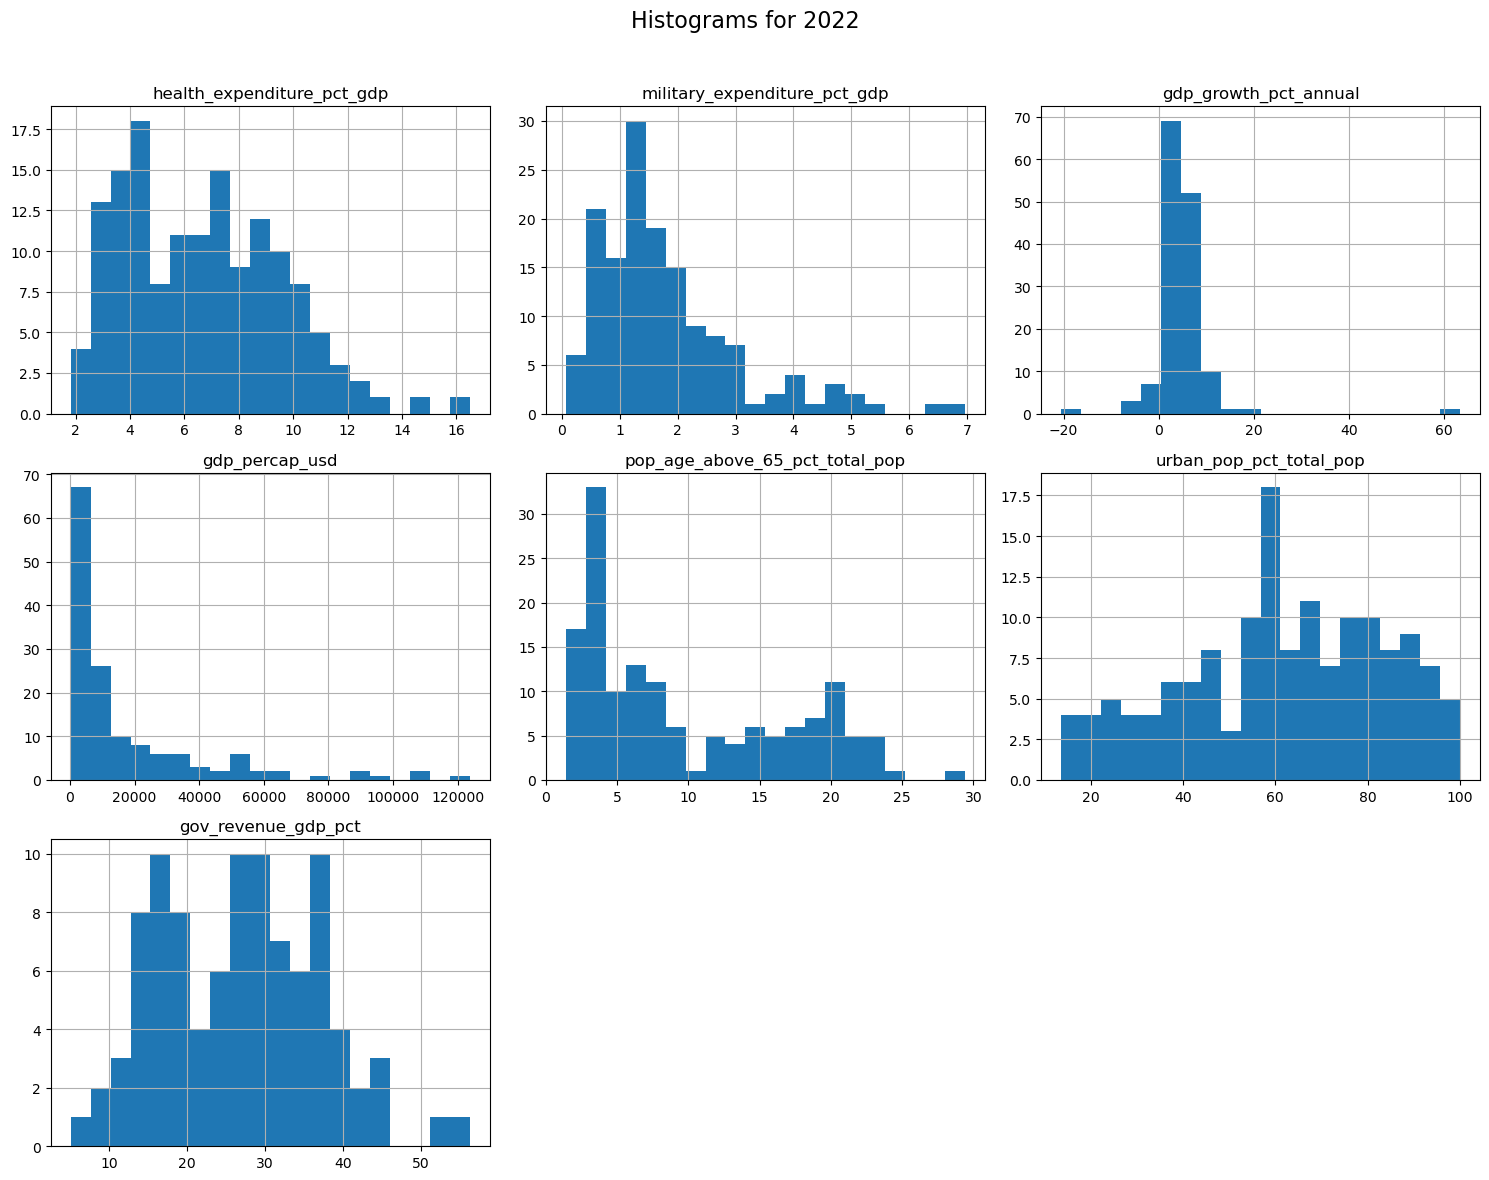

In [35]:
# create histograms

columns = [
    'health_expenditure_pct_gdp',
    'military_expenditure_pct_gdp',
    'gdp_growth_pct_annual',
    'gdp_percap_usd',
    'pop_age_above_65_pct_total_pop',
    'urban_pop_pct_total_pop',
    'gov_revenue_gdp_pct'
]

df_2022[columns].hist(bins=20, figsize=(15, 12))
plt.suptitle(f'Histograms for 2022', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 3.3. Analysis of the relationship with the target variable
After this I looked at the relationship of the variables with the target variable by creating scatterplots in order to answer our initial research question. Looking at the scatterplot of health expenditure and military spending, a slight negative association can be seen but we cannot expect a strong statistical relationship between the two variables. However, we can expect a strong statistical relationship between healthcare spending and the proportion of the population aged 65+ years. In the case of urbanization, there is also a slight positive correlation between the proportion of the population living in urban areas and healthcare spending. 

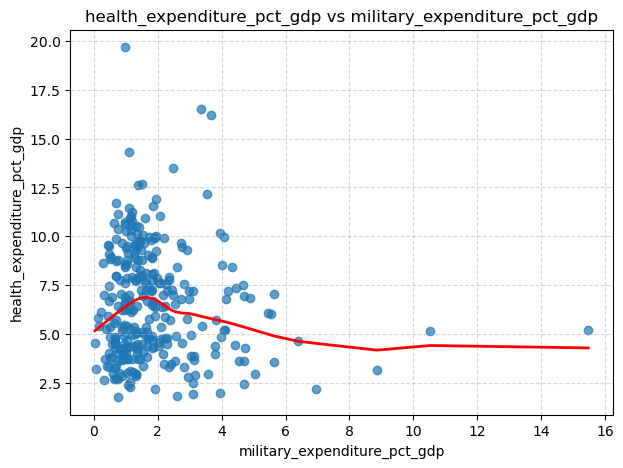

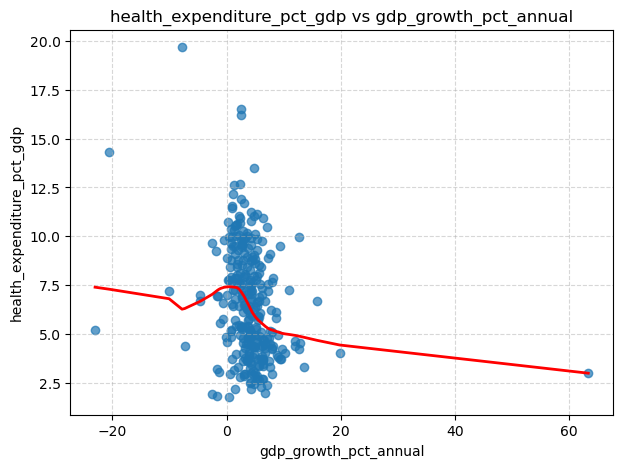

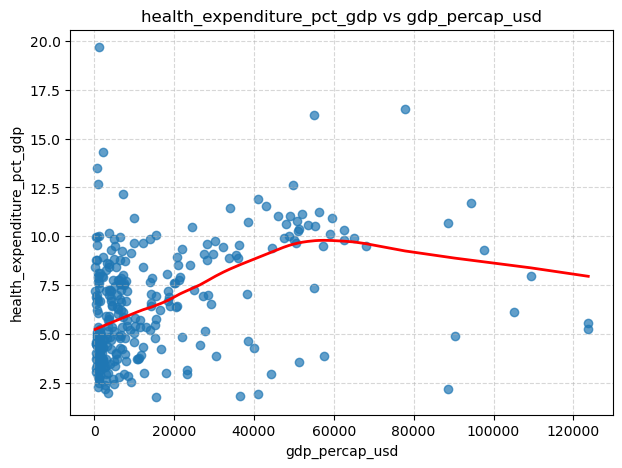

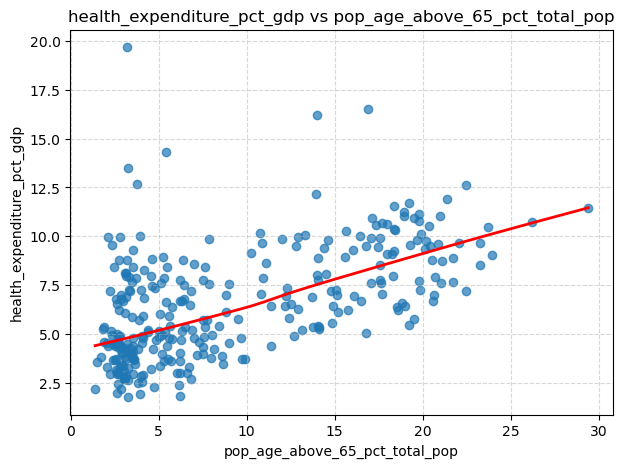

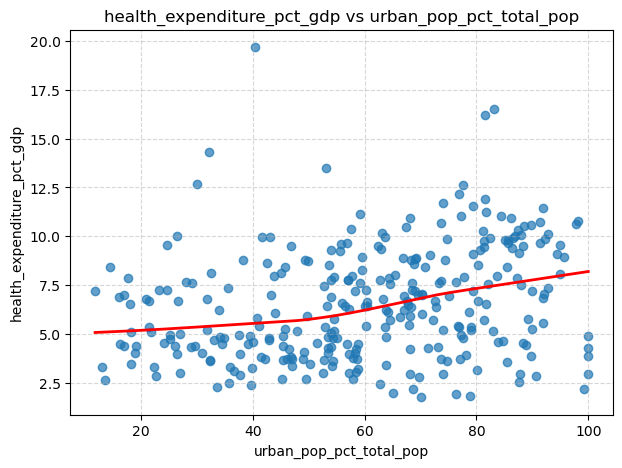

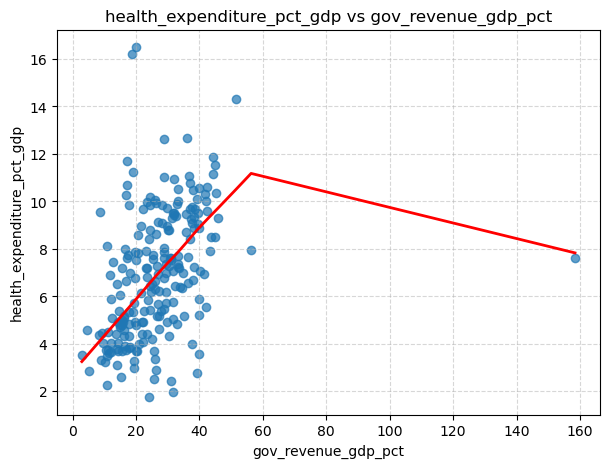

In [36]:
# create scatterplots

y_col = 'health_expenditure_pct_gdp'

for col in columns[1:]:
    plt.figure(figsize=(7,5))
    plt.scatter(df[col], df[y_col], alpha=0.7)
    lowess = sm.nonparametric.lowess
    smoothed = lowess(df[y_col], df[col], frac=0.8)
    plt.plot(smoothed[:,0], smoothed[:,1], color='red', linewidth=2, label="LOWESS")
    plt.title(f'{y_col} vs {col}')
    plt.xlabel(col)
    plt.ylabel(y_col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

Next I checked the categorical variables with boxplots. In case of urbanization and population age, we can see the same pattern as before from the scatterplots. Regarding the income category of countries we can see that countries with the highest income spend considerably more on healthcare than the rest of them. 

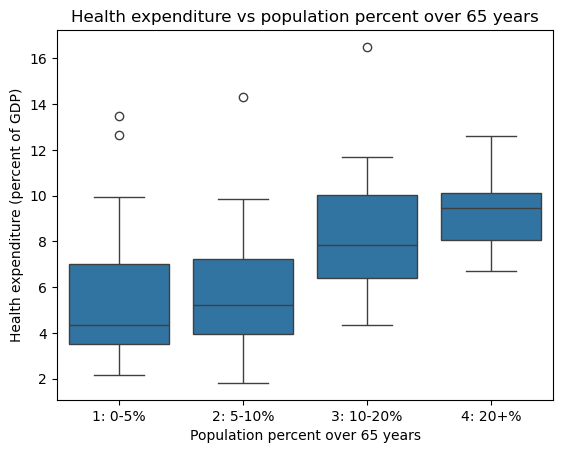

In [37]:
# create boxplots

sns.boxplot(x='old_pop_cat_string', y='health_expenditure_pct_gdp', data=df_2022.sort_values('old_pop_cat_string'))
plt.title('Health expenditure vs population percent over 65 years')
plt.xlabel('Population percent over 65 years')
plt.ylabel('Health expenditure (percent of GDP)')
plt.show()

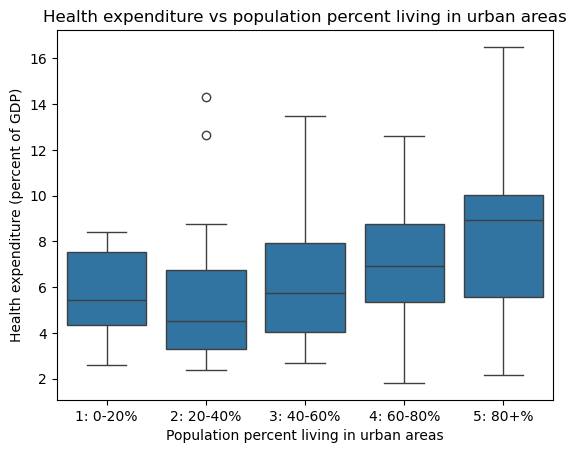

In [38]:
# create boxplots

sns.boxplot(x='urban_pop_cat_string', y='health_expenditure_pct_gdp', data=df_2022.sort_values('urban_pop_cat_string'))
plt.title('Health expenditure vs population percent living in urban areas')
plt.xlabel('Population percent living in urban areas')
plt.ylabel('Health expenditure (percent of GDP)')
plt.show()

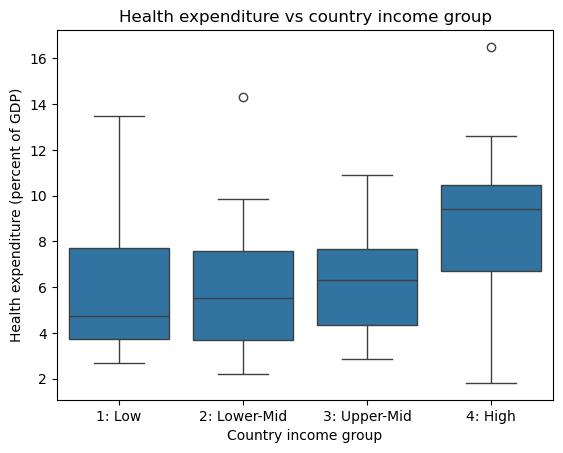

In [39]:
# create boxplots

sns.boxplot(x='income_group', y='health_expenditure_pct_gdp', data=df_2022.sort_values('income_group'))
plt.title('Health expenditure vs country income group')
plt.xlabel('Country income group')
plt.ylabel('Health expenditure (percent of GDP)')
plt.show()

Lastly I created a correlation matrix of numeric variables, including the dummy variables. The main observations regarding the relationship with the dependent variable are the following:

1. The key variable (military expenditure) has a low negative correlation with health expenditure so we cannot expect strong evidence in the regression for the original hypothesis that increased military spending increases social inequality by reducing the available budget for healthcare expenditure.
2. High government revenue countries have higher healthcare expenditure (53% correlation).
3. Countries with less than 5% of population aged higher than 65 years have lower healthcare expenditure (-37% correlation).
4. Countries with higher proportion (10%+) of population aged higher than 65 years have higher healthcare expenditure (34% correlation).
5. Where the GDP per capita is high, healthcare expenditure is also high (38% correlation).

I also checked correlation between the control variables. Higher correlation can be seen in the following cases:

6. Countries with high percent of the population living in urban areas have higher GDP per capita (56% correlation).
7. Low income countries have low percent of population aged higher than 65 years (58% correlation).

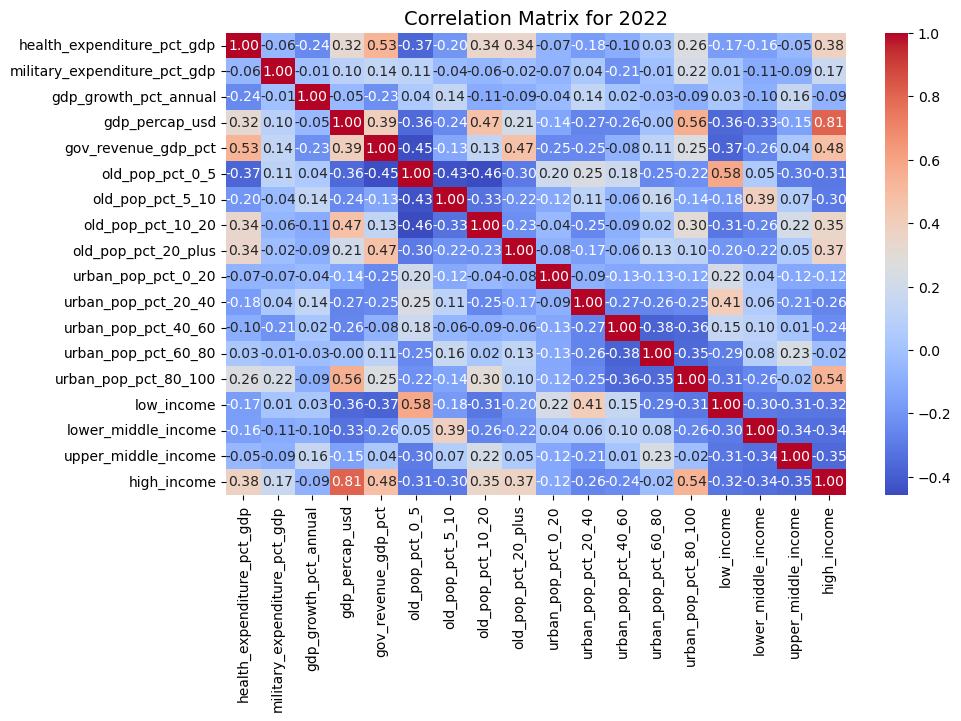

In [40]:
# create correlation matrix

cols_to_check = [
    'health_expenditure_pct_gdp',
    'military_expenditure_pct_gdp',
    'gdp_growth_pct_annual',
    'gdp_percap_usd',
    'gov_revenue_gdp_pct',
    'old_pop_pct_0_5',
    'old_pop_pct_5_10',
    'old_pop_pct_10_20',
    'old_pop_pct_20_plus',
    'urban_pop_pct_0_20',
    'urban_pop_pct_20_40',
    'urban_pop_pct_40_60',
    'urban_pop_pct_60_80',
    'urban_pop_pct_80_100',
    'low_income',
    'lower_middle_income',
    'upper_middle_income',
    'high_income'
]
corr = df_2022[cols_to_check].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap="coolwarm",
    cbar=True
)
plt.title("Correlation Matrix for 2022", fontsize=14)
plt.show()

### 3.4. Regression models

I ran 7 regressions starting from the simplest to the more complex. 

In the first regression I looked at the relationship between health expenditure and military expenditure. As expected, there is a slight negative association between them, but this is not statistically significant. The intercept for this model is 6.939, which means that if there is no military expenditure (0% of GDP), the expected expenditure on healthcare would be about 6.94% of GDP. The slope is -0.130, which means that for each 1 percentage point increase in military expenditure, health expenditure is predicted to decrease by 0.13 percentage points on average, so there is a slight crowd-out effect but it is not statistically significant.

In the rest of the regressions I added more control variables. The conclusions are the following:
1. First I added the income indicators (regressions 2 & 3), GDP growth % and GDP per capita income groups. We can see that in case of model 3 the explanatory power of the model increased to 16% and the direction of the parameters are as expected. The estimated parameter of 2.808 for high-income countries means that compared to the baseline low-income countries with high income, on average, spend almost 3 percentage point more of their GDP on healthcare.
2. In regression 4 I added the age-related dummy variables. As expected, the parameters of age are statistically significant - if we look at countries with higher percent (10-20%, 20+%) of older population we can expect that they spend, on average, 3.792 and 4.615 percentage points more on healthcare than countries with 0-5% old population (baseline). The explanatory power of the model also increased to about 30%.
3. Adding the urban population dummy variables in regression 5 only improved the explanatory power by 1 percentage point, while the coefficients are not significant (as was expected from the scatterplot). Therefore I will not include it as a control variable in the next model due to the low number of observations.
4. Next I added the government revenue indicator. As expected, governments with higher revenue are expected to spend more on healthcare, for example in case of welfare states.
5. In the last regression I took out those variables which were not significant and the explanatory power of the module remained around 35%.

In conclusion, I would choose model 6 or model 7.

- Model 6: It has all the important drivers, the explanatory power is the highest with 40.6%, however due to the hight number of control variables there is a risk of overfitting with only 96 observations.
- Model 7: It has lower explanatory power with 34.4% but by dropping some controls there is a lower risk of overfitting.  

In [41]:
# regression models for 2022

reg1 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp', data=df_2022).fit(cov_type="HC1")
reg2 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+gdp_growth_pct_annual', data=df_2022).fit(cov_type="HC1")
reg3 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income', data=df_2022).fit(cov_type="HC1")
reg4 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus', data=df_2022).fit(cov_type="HC1")
reg5 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus+urban_pop_pct_20_40+urban_pop_pct_40_60+urban_pop_pct_60_80+urban_pop_pct_80_100', data=df_2022).fit(cov_type="HC1")
reg6 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus+gov_revenue_gdp_pct', data=df_2022).fit(cov_type="HC1")
reg7 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+old_pop_pct_10_20+old_pop_pct_20_plus+gov_revenue_gdp_pct', data=df_2022).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6,reg7])
stargazer

Additionally, I ran the same regressions only on the upper-middle and high income countries (77 observations). On 10% and 5% significance levels, the beta coefficient of military expenditure becomes statistically significant, which indicates that our initial hypothesis - that military spending leads to a crowd-out effect, lowering public healthcare spending - is possibly true in countries with higher income.

However, looking at regression models 4-7 is not meaningful due overfitting on a low number of observations (62).

In [42]:
# regression models for 2022 - upper-middle and high income countries only

reg1 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp', data=df_2022[(df_2022['income_group'] == '3: Upper-Mid') | (df_2022['income_group'] == '4: High')]).fit(cov_type="HC1")
reg2 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+gdp_growth_pct_annual', data=df_2022[(df_2022['income_group'] == '3: Upper-Mid') | (df_2022['income_group'] == '4: High')]).fit(cov_type="HC1")
reg3 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income', data=df_2022[(df_2022['income_group'] == '3: Upper-Mid') | (df_2022['income_group'] == '4: High')]).fit(cov_type="HC1")
reg4 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus', data=df_2022[(df_2022['income_group'] == '3: Upper-Mid') | (df_2022['income_group'] == '4: High')]).fit(cov_type="HC1")
reg5 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus+urban_pop_pct_20_40+urban_pop_pct_40_60+urban_pop_pct_60_80+urban_pop_pct_80_100', data=df_2022[(df_2022['income_group'] == '3: Upper-Mid') | (df_2022['income_group'] == '4: High')]).fit(cov_type="HC1")
reg6 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus+gov_revenue_gdp_pct', data=df_2022[(df_2022['income_group'] == '3: Upper-Mid') | (df_2022['income_group'] == '4: High')]).fit(cov_type="HC1")
reg7 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+old_pop_pct_10_20+old_pop_pct_20_plus+gov_revenue_gdp_pct', data=df_2022[(df_2022['income_group'] == '3: Upper-Mid') | (df_2022['income_group'] == '4: High')]).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6,reg7])
stargazer

### 4. External validity

To assert the external validity of the previous results, I ran the 7 regressions on another year. I chose year 2014 to allow enough time for policy changes. For regressions 1-3 the parameter of military expenditure is statistically significant, but after including age group dummy variables there is no evidence that the higher spending on military leads to lower spending on health and the explanatory power of the models did not change substantially.  

In [43]:
# regression models for 2014

reg1 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp', data=df_2014).fit(cov_type="HC1")
reg2 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+gdp_growth_pct_annual', data=df_2014).fit(cov_type="HC1")
reg3 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income', data=df_2014).fit(cov_type="HC1")
reg4 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus', data=df_2014).fit(cov_type="HC1")
reg5 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus+urban_pop_pct_20_40+urban_pop_pct_40_60+urban_pop_pct_60_80+urban_pop_pct_80_100', data=df_2014).fit(cov_type="HC1")
reg6 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus+gov_revenue_gdp_pct', data=df_2014).fit(cov_type="HC1")
reg7 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+old_pop_pct_10_20+old_pop_pct_20_plus+gov_revenue_gdp_pct', data=df_2014).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6,reg7])
stargazer

I also ran the regressions on the 2014 data with only upper-middle and high income countries, which yielded similar results as the regressions on the 2022 data filtered for upper-middle and high income countries.

In [44]:
# regression models for 2014 - upper-middle and high income countries only

reg1 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp', data=df_2014[(df_2014['income_group'] == '3: Upper-Mid') | (df_2014['income_group'] == '4: High')]).fit(cov_type="HC1")
reg2 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+gdp_growth_pct_annual', data=df_2014[(df_2014['income_group'] == '3: Upper-Mid') | (df_2014['income_group'] == '4: High')]).fit(cov_type="HC1")
reg3 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income', data=df_2014[(df_2014['income_group'] == '3: Upper-Mid') | (df_2014['income_group'] == '4: High')]).fit(cov_type="HC1")
reg4 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus', data=df_2014[(df_2014['income_group'] == '3: Upper-Mid') | (df_2014['income_group'] == '4: High')]).fit(cov_type="HC1")
reg5 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus+urban_pop_pct_20_40+urban_pop_pct_40_60+urban_pop_pct_60_80+urban_pop_pct_80_100', data=df_2014[(df_2014['income_group'] == '3: Upper-Mid') | (df_2014['income_group'] == '4: High')]).fit(cov_type="HC1")
reg6 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+lower_middle_income+upper_middle_income+high_income+old_pop_pct_5_10+old_pop_pct_10_20+old_pop_pct_20_plus+gov_revenue_gdp_pct', data=df_2014[(df_2014['income_group'] == '3: Upper-Mid') | (df_2014['income_group'] == '4: High')]).fit(cov_type="HC1")
reg7 = smf.ols(formula='health_expenditure_pct_gdp~military_expenditure_pct_gdp+old_pop_pct_10_20+old_pop_pct_20_plus+gov_revenue_gdp_pct', data=df_2014[(df_2014['income_group'] == '3: Upper-Mid') | (df_2014['income_group'] == '4: High')]).fit(cov_type="HC1")

stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6,reg7])
stargazer



### 5. Summary

To summarize the findings, analyzing the 2022 data I could not find statistical evidence that confirms my hypothesis that increased military expenditure leads to lower healthcare spending. Only looking at the countries with higher income the military expenditure had a slight crowd-out effect on healthcare spending on 10% significance level. I found that the main driver of the healthcare spending is the high percent of people older than 65 years in the population. In order to achieve more robust results, moving beyond 2022 to use time series cross-sectional data would be the next step.